# **Week2**

Ex1) Data Collection
Ex2) Feature Extraction

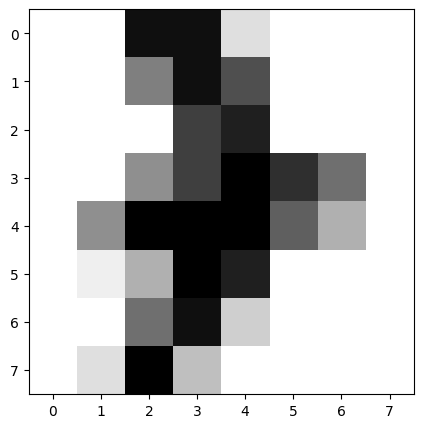

[ 0.  0. 15. 15.  2.  0.  0.  0.  0.  0.  8. 15. 11.  0.  0.  0.  0.  0.
  0. 12. 14.  0.  0.  0.  0.  0.  7. 12. 16. 13.  9.  0.  0.  7. 16. 16.
 16. 10.  5.  0.  0.  1.  5. 16. 14.  0.  0.  0.  0.  0.  9. 15.  3.  0.
  0.  0.  0.  2. 16.  4.  0.  0.  0.  0.]
이 숫자는 7 입니다.


In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt

digit = datasets.load_digits()

plt.figure(figsize =(5,5))
plt.imshow(digit.images[191], cmap = plt.cm.gray_r,interpolation='nearest')

plt.show()
print(digit.data[191])
print('이 숫자는', digit.target[191], '입니다.')

Ex3) Modeling
Ex4) Prediction

In [ ]:
from sklearn import datasets
from sklearn import svm

digit = datasets.load_digits()

s = svm.SVC(gamma = 0.1, C = 10)
s.fit(digit.data, digit.target) # digit 데이터로 모델 학습

new_data = (digit.data[0], digit.data[1], digit.data[2]) # 새로운 샘플 데이터라고 생각
result = s.predict(new_data)

print("예측값은", result)
print("참값은", digit.target[0], digit.target[1], digit.target[2])


result = s.predict(digit.data)
correct = [i for i in range(len(result)) if result[i] == digit.target[i]] # -> 뭐지?
accuracy = len(correct)/len(result)
print("화소 특징을 사용했을 때 정확률 =", accuracy*100,"%")

예측값은 [0 1 2]
참값은 0 1 2
화소 특징을 사용했을 때 정확률 = 100.0 %


#**Week 3**


#### MLP implementation example

In [ ]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터 셋을 읽고 훈련, 테스트로 분할
digit = datasets.load_digits()
x_train,x_test,y_train,y_test = train_test_split(digit.data, digit.target, train_size = 0.6) # train,teat,train,test

# MLP 분류기 모델을 학습
mlp = MLPClassifier(hidden_layer_sizes=(100), learning_rate_init=0.001, batch_size=64, max_iter=300, solver='sgd', verbose=0) # batch_size = 32 -> 64
mlp.fit(x_train, y_train)

res = mlp.predict(x_test)

# 혼동 행렬 계산
conf = np.zeros((10,10))
for i in range(len(res)):
  conf[res[i]][y_test[i]]+=1
print(conf)

# 정확도 계산
no_correct = 0
for i in range(10):
  no_correct+=conf[i][i]
  accuracy = no_correct/len(res)
print("테스트 집합에 대한 정확도 = ", accuracy*100, "%")




[[75.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 70.  0.  0.  0.  0.  0.  0.  1.  1.]
 [ 0.  0. 74.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0. 75.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0. 67.  1.  1.  2.  0.  0.]
 [ 0.  0.  0.  0.  0. 66.  0.  0.  3.  0.]
 [ 0.  0.  0.  0.  0.  0. 70.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 67.  1.  1.]
 [ 0.  2.  0.  0.  1.  0.  1.  0. 68.  2.]
 [ 0.  0.  0.  0.  1.  0.  0.  1.  0. 65.]]
테스트 집합에 대한 정확도 =  96.94019471488178 %


#### 와인 데이터 셋

In [ ]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# 와인 데이터셋을 로드
wine = datasets.load_wine()
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, train_size=0.7)

# MLP 분류기 모델을 학습 (하이퍼파라미터 조정)
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), learning_rate_init=0.01, batch_size=32, max_iter=200, solver='adam', verbose=0)
mlp.fit(x_train, y_train)

# 테스트 데이터에 대한 예측
res = mlp.predict(x_test)

# 혼동 행렬 계산
conf = np.zeros((3, 3))
for i in range(len(res)):
  conf[res[i]][y_test[i]] += 1
print(conf)

# 정확도 계산
no_correct = 0
for i in range(3):
  no_correct += conf[i][i]
accuracy = no_correct / len(res)
print("테스트 집합에 대한 정확도 = ", accuracy * 100, "%")

[[19.  1.  0.]
 [ 2. 18.  0.]
 [ 0.  1. 13.]]
테스트 집합에 대한 정확도 =  92.5925925925926 %


#**Week 5**

#### TensorFlow basics usage

In [ ]:
import tensorflow as tf

print(tf.__version__)
a = tf.random.uniform([2,3],0,1)
print(a)
print(type(a))

2.14.0
tf.Tensor(
[[0.15980911 0.8520906  0.11287737]
 [0.7298515  0.467301   0.10317373]], shape=(2, 3), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
import tensorflow as ft
import numpy as np

t = tf.random.uniform([2,3],0,1) # random.uniform() -> 균일한 분포에서 난수 생성
print("tensorflow로 생성한 텐서:\n", t,"\n")
n = np.random.uniform(0,1,[2,3])
print("numpy로 생성한 ndarray:\n", n,"\n")

res = n+t
print("덧셈 결과:\n",res) # 계산 가능 -> tensor로 나옴

tensorflow로 생성한 텐서:
 tf.Tensor(
[[0.19398451 0.01927185 0.2850405 ]
 [0.24986005 0.10516381 0.7987995 ]], shape=(2, 3), dtype=float32) 

numpy로 생성한 ndarray:
 [[0.74271829 0.93046883 0.15160686]
 [0.09495999 0.63599879 0.44434344]] 

덧셈 결과:
 tf.Tensor(
[[0.9367028  0.94974065 0.43664736]
 [0.34482002 0.7411626  1.243143  ]], shape=(2, 3), dtype=float32)


#### Toy datasets structure

In [ ]:
import tensorflow as tf

# MNIST 읽고 텐서 모양 출력
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
yy_train = tf.one_hot(y_train,10,dtype=tf.int8)
print("MNIST:", x_train.shape, y_train.shape, yy_train.shape)

# CIFAR-10 읽고 텐서 모양 출력
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
yy_train = tf.one_hot(y_train,10,dtype=tf.int8)
print("CIFAR-10:", x_train.shape, y_train.shape, yy_train.shape)

# Boston Housing 읽고 텐서 모양 출력
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data()
print("Boston Housing:", x_train.shape, y_train.shape)

# Reuters 읽고 텐서 모양 출력
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.reuters.load_data()
print("Reuters:", x_train.shape, y_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
MNIST: (60000, 28, 28) (60000,) (60000, 10)
170498071/170498071 [==============================] - 2s 0us/step
CIFAR-10: (50000, 32, 32, 3) (50000, 1) (50000, 1, 10)
57026/57026 [==============================] - 0s 0us/step
Boston Housing: (404, 13) (404,)
2110848/2110848 [==============================] - 0s 0us/step
Reuters: (8982,) (8982,)


#### Limits of sklearn’s expressive power?

In [ ]:
from sklearn.neural_network import MLPClassifier

digit = datasets.load_digits()
x_train, x_test, y_train, y_test = train_test_split(digit.data, digit.target, train_size=0.6)

mlp = MLPClassifier(hidden_layer_sizes=(100), learning_rate_init=0.001, batch_size=32, max_iter=300, solver='sgd', verbose=False)
mlp.fit(x_train,y_train)

MLPClassifier(batch_size=32, hidden_layer_sizes=100, max_iter=300, solver='sgd')

#### Perceptron operation (forward computation)

In [ ]:
import tensorflow as tf

# OR 데이터 구축
x = [[0.0, 0.0],[0.0, 1.0],[1.0, 0.0],[1.0, 1.0]]
y = [[-1], [1], [1], [1]]

# 퍼셉트론 구조
w = tf.Variable([[1.0], [1.0]])
b = tf.Variable(-0.5)

# 퍼셉트론 동작
s = tf.add(tf.matmul(x,w),b)
o = tf.sign(s) #
print(o)

tf.Tensor(
[[-1.]
 [ 1.]
 [ 1.]
 [ 1.]], shape=(4, 1), dtype=float32)


In [ ]:
print(tf.sign(5))

tf.Tensor(1, shape=(), dtype=int32)


#### perceptron learning

In [ ]:
import tensorflow as tf

# OR 데이터 구축
x = [[0.0, 0.0],[0.0, 1.0],[1.0, 0.0],[1.0, 1.0]]
y = [[-1], [1], [1], [1]]

# 퍼셉트론 구조
w = tf.Variable(tf.random.uniform([2,1],-0.5,0.5))
b = tf.Variable(tf.zeros([1]))

# 옵티마이저
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

# 전방 계산(4,3)
def forward():
  s = tf.add(tf.matmul(x,w),b)
  o = tf.tanh(s)
  return o

# 손실함수
def loss():
  o = forward()
  return tf.reduce_mean((y-o)**2)

# 500세대까지 학습
for i in range(1000):
  opt.minimize(loss, var_list=[w,b])
  if(i%100==0): print("loss at epoch", i, "=", loss().numpy())

# 예측
o = forward()
print(o)

loss at epoch 0 = 0.60243434
loss at epoch 100 = 0.08745229
loss at epoch 200 = 0.041243505
loss at epoch 300 = 0.026144894
loss at epoch 400 = 0.018910393
loss at epoch 500 = 0.014724396
loss at epoch 600 = 0.012014836
loss at epoch 700 = 0.010125686
loss at epoch 800 = 0.008737175
loss at epoch 900 = 0.007675585
tf.Tensor(
[[-0.87587464]
 [ 0.9226069 ]
 [ 0.92261696]
 [ 0.9997856 ]], shape=(4, 1), dtype=float32)


#### Perceptron_OR problem_Keras

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# OR 데이터 구축
x = [[0.0, 0.0],[0.0, 1.0],[1.0, 0.0],[1.0, 1.0]]
y = [[-1], [1], [1], [1]]

# 옵티마이저
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

# 신경망 설계
n_input = 2
n_output = 1

perceptron = Sequential()
perceptron.add(Dense(units=n_output, activation='tanh', input_shape=(n_input,), kernel_initializer='random_uniform', bias_initializer='zeros'))
# model.add(Dense(number of nodes, activation function,…)) method
# activation='tanh' -> 음수값 처리가능

# 신경망 학습
perceptron.compile(loss='mse', optimizer=opt, metrics=['mse'])
perceptron.fit(x,y,epochs=500,verbose=2)

res=perceptron.predict(x)
print(res)

Epoch 1/500
1/1 - 1s - loss: 0.9895 - mse: 0.9895 - 941ms/epoch - 941ms/step
Epoch 2/500
1/1 - 0s - loss: 0.7443 - mse: 0.7443 - 11ms/epoch - 11ms/step
Epoch 3/500
1/1 - 0s - loss: 0.6370 - mse: 0.6370 - 15ms/epoch - 15ms/step
Epoch 4/500
1/1 - 0s - loss: 0.5842 - mse: 0.5842 - 8ms/epoch - 8ms/step
Epoch 5/500
1/1 - 0s - loss: 0.5521 - mse: 0.5521 - 9ms/epoch - 9ms/step
Epoch 6/500
1/1 - 0s - loss: 0.5291 - mse: 0.5291 - 7ms/epoch - 7ms/step
Epoch 7/500
1/1 - 0s - loss: 0.5105 - mse: 0.5105 - 8ms/epoch - 8ms/step
Epoch 8/500
1/1 - 0s - loss: 0.4943 - mse: 0.4943 - 9ms/epoch - 9ms/step
Epoch 9/500
1/1 - 0s - loss: 0.4796 - mse: 0.4796 - 10ms/epoch - 10ms/step
Epoch 10/500
1/1 - 0s - loss: 0.4659 - mse: 0.4659 - 8ms/epoch - 8ms/step
Epoch 11/500
1/1 - 0s - loss: 0.4529 - mse: 0.4529 - 11ms/epoch - 11ms/step
Epoch 12/500
1/1 - 0s - loss: 0.4404 - mse: 0.4404 - 8ms/epoch - 8ms/step
Epoch 13/500
1/1 - 0s - loss: 0.4285 - mse: 0.4285 - 8ms/epoch - 8ms/step
Epoch 14/500
1/1 - 0s - loss: 0.417

#### MNIST_DMLP_keras

Epoch 1/60
235/235 - 4s - loss: 0.0322 - accuracy: 0.8749 - val_loss: 0.0165 - val_accuracy: 0.9356 - 4s/epoch - 18ms/step
Epoch 2/60
235/235 - 2s - loss: 0.0127 - accuracy: 0.9459 - val_loss: 0.0117 - val_accuracy: 0.9528 - 2s/epoch - 8ms/step
Epoch 3/60
235/235 - 2s - loss: 0.0089 - accuracy: 0.9611 - val_loss: 0.0079 - val_accuracy: 0.9625 - 2s/epoch - 6ms/step
Epoch 4/60
235/235 - 1s - loss: 0.0066 - accuracy: 0.9705 - val_loss: 0.0069 - val_accuracy: 0.9683 - 1s/epoch - 4ms/step
Epoch 5/60
235/235 - 1s - loss: 0.0052 - accuracy: 0.9770 - val_loss: 0.0056 - val_accuracy: 0.9732 - 883ms/epoch - 4ms/step
Epoch 6/60
235/235 - 1s - loss: 0.0041 - accuracy: 0.9820 - val_loss: 0.0053 - val_accuracy: 0.9747 - 906ms/epoch - 4ms/step
Epoch 7/60
235/235 - 1s - loss: 0.0034 - accuracy: 0.9852 - val_loss: 0.0049 - val_accuracy: 0.9759 - 973ms/epoch - 4ms/step
Epoch 8/60
235/235 - 1s - loss: 0.0030 - accuracy: 0.9872 - val_loss: 0.0041 - val_accuracy: 0.9789 - 893ms/epoch - 4ms/step
Epoch 9/60


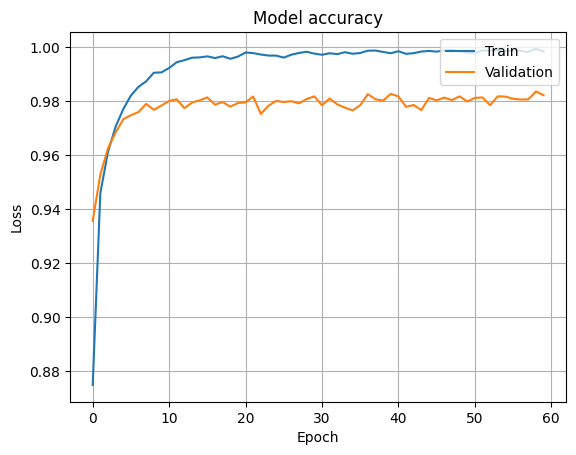

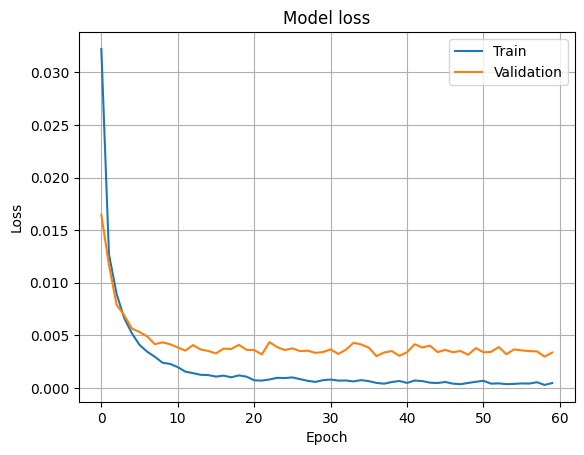

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Mnist data 준비
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784) # 텐서를 백터(1차원)로 변환
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype(np.float32)/255.0 # ndarray(n 차원 배열)로 변환
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train,10) # 원 핫 인코딩
y_test = tf.keras.utils.to_categorical(y_test,10)

# 심층신경망(DMLP) 구조 설정
n_input=784
n_hidden=1024
n_hidden1=512
n_hidden2=512
n_hidden3=512
n_output=10

# 신경망 구조 설계
mlp=Sequential()
mlp.add(Dense(units=n_hidden, activation='tanh', input_shape=(n_input,), kernel_initializer='random_uniform', bias_initializer='zeros')) # hidden layer
mlp.add(Dense(units=n_hidden1, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros')) # hidden layer
mlp.add(Dense(units=n_hidden2, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros')) # hidden layer
mlp.add(Dense(units=n_hidden3, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros')) # hidden layer
mlp.add(Dense(units=n_output, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros')) # output layer

# neural network 훈련
mlp.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist=mlp.fit(x_train, y_train, batch_size=256, epochs=60, validation_data=(x_test, y_test), verbose=2)

res=mlp.evaluate(x_test,y_test,verbose=0)
print('정확률은', res[1]*100)
print(hist)



# 시각화
import matplotlib.pyplot as plt

# Mnist 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Loss')recapequi
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.grid()
plt.show()

# 손실함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.grid()
plt.show()

#**Week 6**

#### LeNet(C-P-C-P-C-FC-FC)

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# MNIST를 읽고 신경망에 input shape으로 변환
(x_train, y_train),(x_test,y_test) = mnist.load_data()

# input 텐서 변형 (1-> 행[a,b,c]으로 구성된 데이터를 열[[a],[b],[c]]로 구성된 데이터로 변형)
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

# 정규화
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

# one-hot-encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print(f'x_train.shape: {x_train.shape}')
print(f'x_test.shape: {x_test.shape}')
print('\n')
print(f'y_train.shape: {y_train.shape}')
print(f'y_test.shape: {y_test.shape}')

11490434/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28, 1)
x_test.shape: (10000, 28, 28, 1)


y_train.shape: (60000, 10)
y_test.shape: (10000, 10)


Epoch 1/30
469/469 - 17s - loss: 0.2172 - accuracy: 0.9313 - val_loss: 0.0634 - val_accuracy: 0.9816 - 17s/epoch - 37ms/step
Epoch 2/30
469/469 - 4s - loss: 0.0570 - accuracy: 0.9822 - val_loss: 0.0462 - val_accuracy: 0.9850 - 4s/epoch - 8ms/step
Epoch 3/30
469/469 - 3s - loss: 0.0381 - accuracy: 0.9880 - val_loss: 0.0361 - val_accuracy: 0.9886 - 3s/epoch - 7ms/step
Epoch 4/30
469/469 - 4s - loss: 0.0309 - accuracy: 0.9904 - val_loss: 0.0321 - val_accuracy: 0.9906 - 4s/epoch - 7ms/step
Epoch 5/30
469/469 - 4s - loss: 0.0227 - accuracy: 0.9927 - val_loss: 0.0274 - val_accuracy: 0.9910 - 4s/epoch - 8ms/step
Epoch 6/30
469/469 - 2s - loss: 0.0199 - accuracy: 0.9935 - val_loss: 0.0323 - val_accuracy: 0.9895 - 2s/epoch - 5ms/step
Epoch 7/30
469/469 - 2s - loss: 0.0153 - accuracy: 0.9951 - val_loss: 0.0296 - val_accuracy: 0.9893 - 2s/epoch - 4ms/step
Epoch 8/30
469/469 - 2s - loss: 0.0144 - accuracy: 0.9953 - val_loss: 0.0393 - val_accuracy: 0.9878 - 2s/epoch - 4ms/step
Epoch 9/30
469/469 - 

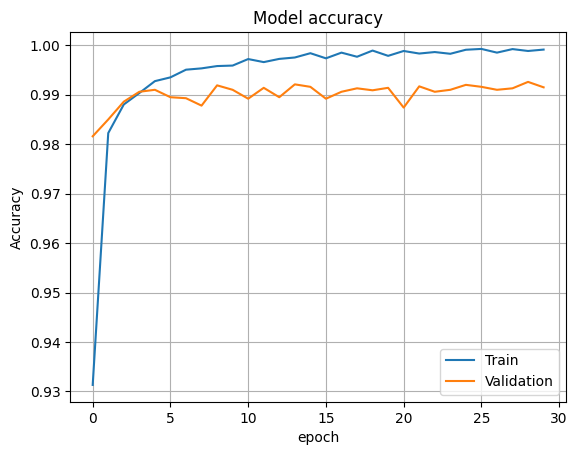

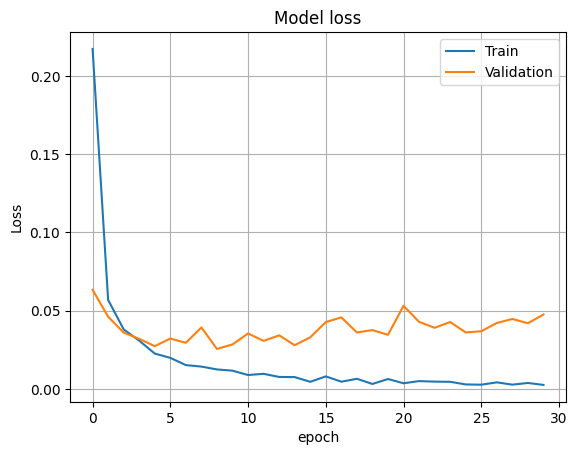

In [ ]:
# LeNe-5 신경망 모델 설계
cnn = Sequential()
cnn.add(Conv2D(6,(5,5), padding='same', activation='relu', input_shape=(28,28,1))) # 커널 수=6, 커널 사이즈=(5,5)
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(16,(5,5), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(120,(5,5), padding='same', activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(84, activation='relu'))
cnn.add(Dense(10, activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
hist = cnn.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test), verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test, y_test,verbose=0)
print("정확률은",res[1]*100)

# 정확률 그래프
plt.plot(hist.history["accuracy"]) # train accuracy??
plt.plot(hist.history["val_accuracy"]) # validation accuracy?? why?
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history["loss"]) # train loss??
plt.plot(hist.history["val_loss"]) # validation loss?? why?
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

In [ ]:
print(hist.history["accuracy"])
print(hist.history)

[0.9313166737556458, 0.9822499752044678, 0.9880333542823792, 0.9903500080108643, 0.9927499890327454, 0.9935166835784912, 0.9950666427612305, 0.9953333139419556, 0.9958000183105469, 0.9958999752998352, 0.9972166419029236, 0.9965999722480774, 0.9972500205039978, 0.9975333213806152, 0.9983999729156494, 0.9973666667938232, 0.9985166788101196, 0.9976833462715149, 0.9989333152770996, 0.997866690158844, 0.9988499879837036, 0.9983333349227905, 0.9986333250999451, 0.998283326625824, 0.9991000294685364, 0.9992666840553284, 0.9985166788101196, 0.9992333054542542, 0.9988499879837036, 0.9991333484649658]
{'loss': [0.21720395982265472, 0.05696304142475128, 0.038122400641441345, 0.030918387696146965, 0.02267475426197052, 0.019933054223656654, 0.015302425250411034, 0.014362330548465252, 0.012535033747553825, 0.01174872275441885, 0.0089706527069211, 0.009744193404912949, 0.007737198378890753, 0.007651766762137413, 0.004644437227398157, 0.008100169710814953, 0.004718460608273745, 0.00655401311814785, 0.

#### CIFER-10 Recognition Using CNN

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# CIFAR-10 data 준비, 신경망에 입력 형태로 전환()
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('1 ',x_train.shape)
# CIFAR-10은 읽은 데이터가 (32,32,3) 텐서로 표현되므로 MNIST와 달리 reshape 적용할 필요가 없음
x_train = x_train.astype(np.float32)/255.0 # ndarray(n 차원 배열)로 변환
x_test = x_test.astype(np.float32)/255.0
print('2 ',x_train.shape)
y_train = tf.keras.utils.to_categorical(y_train,10) # 원 핫 인코딩
y_test = tf.keras.utils.to_categorical(y_test,10)
print('3 ',x_train.shape)

# 신경망 모델 설계
cnn = Sequential()
cnn.add(Conv2D(32,(3,3), padding='same', activation='relu', input_shape=(32,32,3))) # 커널 수=32, 커널 사이즈=(3,3, 32?)
cnn.add(Conv2D(32,(3,3), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3), padding='same', activation='relu')) # 커널 수=64, 커널 사이즈=(3,3, 16?)
cnn.add(Conv2D(64,(3,3), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
hist = cnn.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test), verbose=1)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test, y_test,verbose=0)
print("정확률은",res[1]*100)

# 정확률 그래프
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()
cnn.save("my_cnn.h5") # 작업 폴더에 가중치 저장

1  (50000, 32, 32, 3)
2  (50000, 32, 32, 3)
3  (50000, 32, 32, 3)


#### cf) Load trained model

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# 신경망의 구조와 가중치를 저장한 파일을 읽어옴
cnn = tf.keras.models.load_model("my_cnn.h5")
cnn.summary() # 모델 구조 확인

# CIFAR-10 데이터셋을 읽고 신경망에 입력 형태로 변환
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# CIFAR-10은 읽은 데이터가 (32,32,3) 텐서로 표현되므로 MNIST와 달리 reshape 적용할 필요가 없음
x_train = x_train.astype(np.float32)/255.0 # ndarray(n 차원 배열)로 변환
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train,10) # 원 핫 인코딩
y_test = tf.keras.utils.to_categorical(y_test,10)

res=cnn.evaluate(x_test, y_test, verbose=0)
print("정확률",res[1]*100)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

#### cf) Visualization of CNN

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

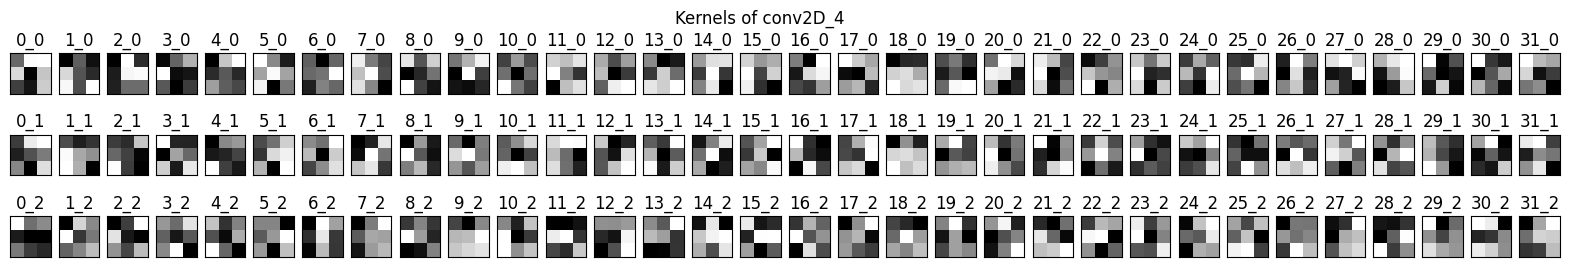

In [ ]:
# 커널 시각화
cnn.summary()

for layer in cnn.layers:
  if 'conv' in layer.name:
    kernel,biases = layer.get_weights()   # 가중치(커널-3D data, 편향-1D data)를 가져옴
    print(layer.name, kernel.shape)       # 커널의 텐서 모양 출력

kernel, biases = cnn.layers[0].get_weights() # 0의 커널 정보 저장
minv,maxv = kernel.min(), kernel.max()
kernel = (kernel-minv)/(maxv-minv)
n_kernel = 32

plt.figure(figsize=(20,3))
plt.suptitle("Kernels of conv2D_4") # 위에 제목
for i in range(n_kernel):     # i번째 커널
  f = kernel[:,:,:,i]
  for j in range(3):          # j번째 커널
    plt.subplot(3, n_kernel, j*n_kernel+i+1)
    plt.imshow(f[:,:,j],cmap='gray')
    plt.xticks([]); plt.yticks([])
    plt.title(str(i)+'_'+str(j))
plt.show()

conv2d_6 (None, 32, 32, 32)
conv2d_7 (None, 32, 32, 32)
conv2d_8 (None, 16, 16, 64)
conv2d_9 (None, 16, 16, 64)
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6_input (InputLayer  [(None, 32, 32, 3)]       0         
 )                                                               
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
Total params: 896 (3.50 KB)
Trainable params: 896 (3.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
313/313 [==============================] - 3s 11ms/step


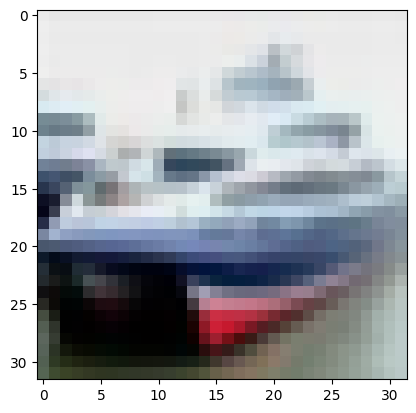

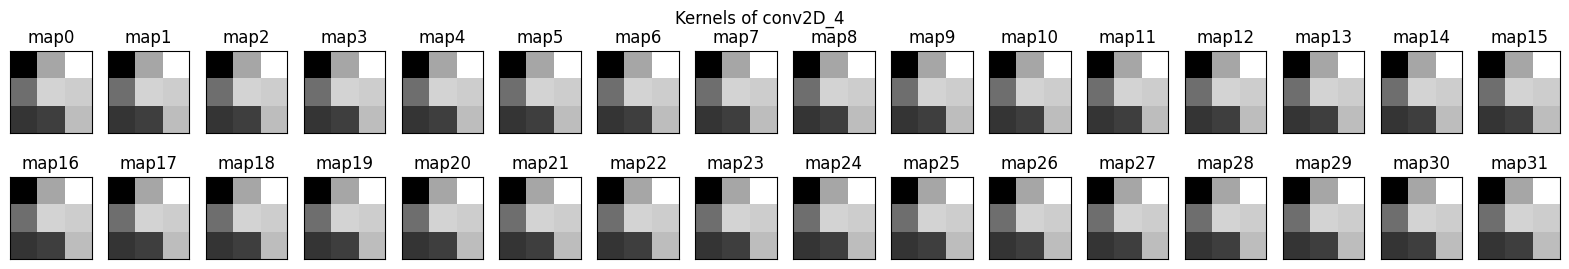

In [ ]:
# feature map 시각화
for layer in cnn.layers:
  if 'conv' in layer.name:
    print(layer.name, layer.output.shape) # 특징 맵의 텐서 모양 출력

from tensorflow.keras.models import Model

partial_model = Model(inputs=cnn.inputs, outputs=cnn.layers[0].output) # layer 0만 때어냄
partial_model.summary()

feature_map = partial_model.predict(x_test) # 부분 모델로 테스트 집합을 예측
fm = feature_map[1] # 1번 영상의 특징 맵을 시각화

plt.imshow(x_test[1]) # 1번 영상을 출력

plt.figure(figsize=(20,3))
plt.suptitle("Kernels of conv2D_4")
for i in range(32):          # i번째 특징 맵
  plt.subplot(2, 16, i+1)
  plt.imshow(f[:,:,j],cmap='gray')
  plt.xticks([]); plt.yticks([])
  plt.title("map"+str(i))
plt.show()

# **Assignment2**

## 1. DMLP MNIST recognition

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import AdamW

# Mnist data 준비
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784) # 텐서를 백터(1차원)로 변환
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype(np.float32)/255.0 # ndarray(n 차원 배열)로 변환
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train,10) # 원 핫 인코딩
y_test = tf.keras.utils.to_categorical(y_test,10)

# 심층신경망(DMLP) 구조 설정
n_input=784
n_hidden=1024
n_hidden1=512
n_hidden2=512
n_hidden3=512
n_output=10

# 신경망 구조 설계
mlp=Sequential()
mlp.add(Dense(units=n_hidden, activation='tanh', input_shape=(n_input,), kernel_initializer='random_uniform', bias_initializer='zeros')) # hidden layer
mlp.add(Dense(units=n_hidden1, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros')) # hidden layer
mlp.add(Dense(units=n_hidden2, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros')) # hidden layer
mlp.add(Dense(units=n_hidden3, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros')) # hidden layer
mlp.add(Dense(units=n_output, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros')) # output layer

# neural network 훈련
mlp.compile(loss='mean_squared_error', optimizer=AdamW(weight_decay=0.01, amsgrad=True), metrics=['accuracy'])
hist=mlp.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=1)

# 정확률 출력
res=mlp.evaluate(x_test,y_test,verbose=0)
print('정확률은', res[1]*100)
print(hist)

mlp.summary() # 모델 구조 확인

Epoch 1/50
469/469 [==============================] - 9s 9ms/step - loss: 0.0259 - accuracy: 0.8971 - val_loss: 0.0121 - val_accuracy: 0.9475
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0101 - accuracy: 0.9536 - val_loss: 0.0084 - val_accuracy: 0.9598
Epoch 3/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0068 - accuracy: 0.9675 - val_loss: 0.0062 - val_accuracy: 0.9677
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0051 - accuracy: 0.9756 - val_loss: 0.0054 - val_accuracy: 0.9720
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0040 - accuracy: 0.9816 - val_loss: 0.0052 - val_accuracy: 0.9725
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0033 - accuracy: 0.9847 - val_loss: 0.0042 - val_accuracy: 0.9775
Epoch 7/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0026 - accuracy: 0.9887 - val_loss: 0.0044 - val_accuracy: 0.9759
Epoch 

## 2.LeNet MNIST,CIFAR-10 recognition

#### 2.1 LeNet MNIST recognition

In [ ]:
# C-P-C-P-C

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# MNIST를 읽고 신경망에 input shape으로 변환
(x_train, y_train),(x_test,y_test) = mnist.load_data()

# input 텐서 변형 (1-> 행[a,b,c]으로 구성된 데이터를 열[[a],[b],[c]]로 구성된 데이터로 변형)
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

# 정규화, one-hot-encoding
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# LeNe-5 신경망 모델 설계
cnn1 = Sequential()
cnn1.add(Conv2D(6,(5,5), padding='same', activation='relu', input_shape=(28,28,1))) # 커널 수=6, 커널 사이즈=(5,5,1)
cnn1.add(MaxPooling2D(pool_size=(2,2)))
cnn1.add(Conv2D(16,(5,5), padding='same', activation='relu'))
cnn1.add(MaxPooling2D(pool_size=(2,2)))
cnn1.add(Conv2D(120,(5,5), padding='same', activation='relu'))
cnn1.add(Flatten())
cnn1.add(Dense(84, activation='relu'))
cnn1.add(Dense(10, activation='softmax'))

# 신경망 모델 학습
cnn1.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
hist = cnn1.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test), verbose=0)

# 신경망 모델 정확률 평가
res=cnn1.evaluate(x_test, y_test,verbose=0)
print("정확률은",res[1]*100)

# C-P-C-P-C 정확률 그래프
plt.plot(hist.history["accuracy"]) # train accuracy
plt.plot(hist.history["val_accuracy"]) # validation accuracy
plt.title('C-P-C-P-C Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

# C-P-C-P-C 손실 함수 그래프
plt.plot(hist.history["loss"]) # train loss
plt.plot(hist.history["val_loss"]) # validation loss
plt.title('C-P-C-P-C Model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

    8192/11490434 [..............................] - ETA: 0s

KeyboardInterrupt: ignored

Epoch 1/30
469/469 [==============================] - 9s 14ms/step - loss: 0.1531 - accuracy: 0.9526 - val_loss: 0.0374 - val_accuracy: 0.9871
Epoch 2/30
469/469 [==============================] - 6s 12ms/step - loss: 0.0397 - accuracy: 0.9879 - val_loss: 0.0289 - val_accuracy: 0.9898
Epoch 3/30
469/469 [==============================] - 6s 13ms/step - loss: 0.0270 - accuracy: 0.9916 - val_loss: 0.0227 - val_accuracy: 0.9916
Epoch 4/30
469/469 [==============================] - 6s 13ms/step - loss: 0.0192 - accuracy: 0.9938 - val_loss: 0.0236 - val_accuracy: 0.9913
Epoch 5/30
469/469 [==============================] - 6s 13ms/step - loss: 0.0152 - accuracy: 0.9951 - val_loss: 0.0267 - val_accuracy: 0.9921
Epoch 6/30
469/469 [==============================] - 6s 13ms/step - loss: 0.0121 - accuracy: 0.9959 - val_loss: 0.0226 - val_accuracy: 0.9926
Epoch 7/30
469/469 [==============================] - 6s 12ms/step - loss: 0.0098 - accuracy: 0.9968 - val_loss: 0.0312 - val_accuracy: 0.9915

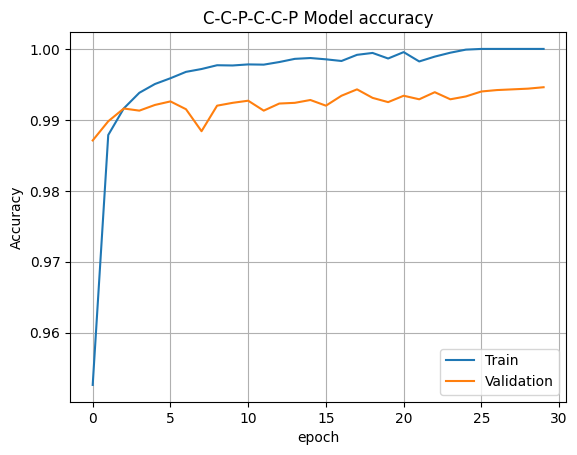

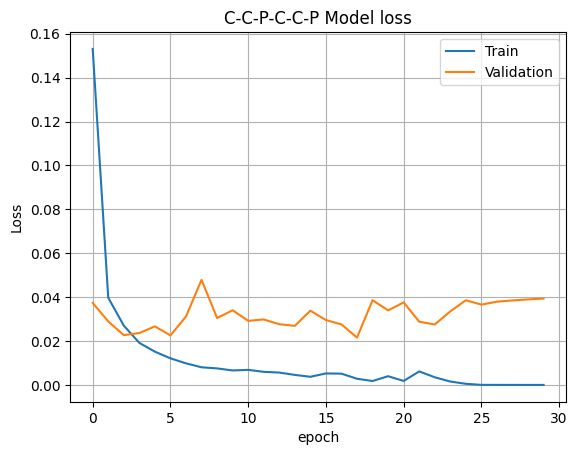

In [ ]:
# C-C-P-C-C-P

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# MNIST를 읽고 신경망에 input shape으로 변환
(x_train, y_train),(x_test,y_test) = mnist.load_data()

# input 텐서 변형 (1-> 행[a,b,c]으로 구성된 데이터를 열[[a],[b],[c]]로 구성된 데이터로 변형)
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

# 정규화, one-hot-encoding
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# LeNet(C-C-P-C-C-P) 신경망 모델 설계
cnn2 = Sequential()
cnn2.add(Conv2D(32,(3,3), padding='same', activation='relu', input_shape=(28,28,1))) # 커널 수=16, 커널 사이즈=(3,3,1)
cnn2.add(Conv2D(32,(3,3), padding='same', activation='relu'))
cnn2.add(MaxPooling2D(pool_size=(2,2)))
cnn2.add(Conv2D(128,(3,3), padding='same', activation='relu'))
cnn2.add(Conv2D(128,(3,3), padding='same', activation='relu'))
cnn2.add(MaxPooling2D(pool_size=(2,2)))
cnn2.add(Flatten())
cnn2.add(Dense(84, activation='relu'))
cnn2.add(Dense(10, activation='softmax'))

# 신경망 모델 학습
cnn2.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
hist = cnn2.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test), verbose=1)

# 신경망 모델 정확률 평가
res=cnn2.evaluate(x_test, y_test,verbose=1)
print("정확률은",res[1]*100)

# C-C-P-C-C-P 정확률 그래프
plt.plot(hist.history["accuracy"]) # train accuracy
plt.plot(hist.history["val_accuracy"]) # validation accuracy
plt.title('C-C-P-C-C-P Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

# C-C-P-C-C-P 손실 함수 그래프
plt.plot(hist.history["loss"]) # train loss
plt.plot(hist.history["val_loss"]) # validation loss
plt.title('C-C-P-C-C-P Model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

#### 2.2 LeNet CIFAR-10 recognition

정확률은 66.1300003528595


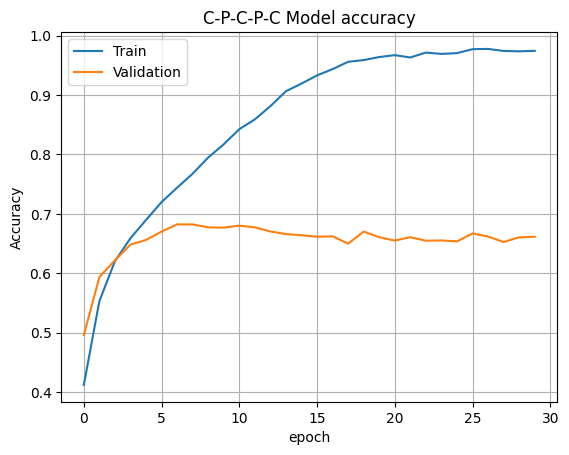

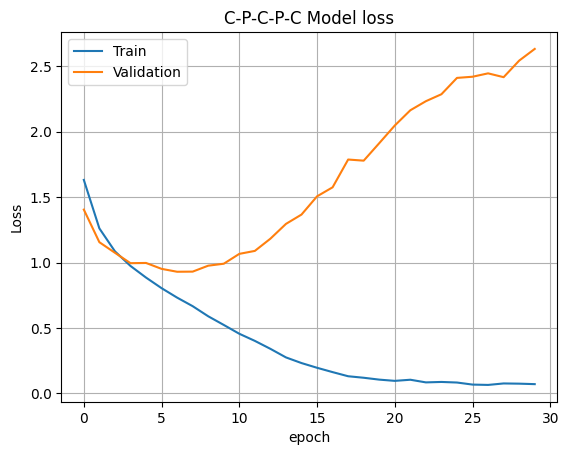

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# CIFAR-10 data 준비, 신경망에 입력 형태로 전환()
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# CIFAR-10은 읽은 데이터가 (32,32,3) 텐서로 표현되므로 MNIST와 달리 reshape 적용할 필요가 없음
x_train = x_train.astype(np.float32)/255.0 # ndarray(n 차원 배열)로 변환
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train,10) # 원 핫 인코딩
y_test = tf.keras.utils.to_categorical(y_test,10)

# LeNe-5 신경망 모델 설계
cnn1 = Sequential()
cnn1.add(Conv2D(6,(5,5), padding='same', activation='relu', input_shape=(32,32,3))) # 커널 수=6, 커널 사이즈=(5,5,3)
cnn1.add(MaxPooling2D(pool_size=(2,2)))
cnn1.add(Conv2D(16,(5,5), padding='same', activation='relu'))
cnn1.add(MaxPooling2D(pool_size=(2,2)))
cnn1.add(Conv2D(120,(5,5), padding='same', activation='relu'))
cnn1.add(Flatten())
cnn1.add(Dense(84, activation='relu'))
cnn1.add(Dense(10, activation='softmax'))

# 신경망 모델 학습
cnn1.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
hist = cnn1.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test), verbose=0)

# 신경망 모델 정확률 평가
res=cnn1.evaluate(x_test, y_test,verbose=0)
print("정확률은",res[1]*100)

# C-P-C-P-C 정확률 그래프
plt.plot(hist.history["accuracy"]) # train accuracy
plt.plot(hist.history["val_accuracy"]) # validation accuracy
plt.title('C-P-C-P-C Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

# C-P-C-P-C 손실 함수 그래프
plt.plot(hist.history["loss"]) # train loss
plt.plot(hist.history["val_loss"]) # validation loss
plt.title('C-P-C-P-C Model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

# **Week 9**

#### Transfer Learning

In [ ]:
import math
import numpy as np
import cv2 as cv
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image

no_class = 20 # 20 종류만 사용

(train_ds, test_ds), info = tfds.load('caltech_birds2011', split=['train', 'test'], shuffle_files=True, data_dir='CUB_200', with_info=True)

# train
x_train, y_train = [], []
for i in train_ds:
  if math.floor(i["label"]) < no_class:
    img = image.img_to_array(i["image"])
    img = cv.resize(img, dsize=(224,224))
    img = preprocess_input(img)
    x_train.append(img)

    label = math.floor(i["label"])
    y_train.append(label)

# test
x_test, y_test = [], []
for i in test_ds:
  if math.floor(i["label"]) < no_class:
    img = image.img_to_array(i["image"])
    img = cv.resize(img, dsize=(224,224))
    img = preprocess_input(img)
    x_test.append(img)

    label = math.floor(i["label"])
    y_test.append(label)

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

y_train = tf.keras.utils.to_categorical(y_train, 20)
y_test = tf.keras.utils.to_categorical(y_test, 20)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/5994 [00:00<?, ? examples/s]

Shuffling CUB_200/caltech_birds2011/0.1.1.incompleteNQFI7Z/caltech_birds2011-train.tfrecord*...:   0%|        …

Generating test examples...:   0%|          | 0/5794 [00:00<?, ? examples/s]

Shuffling CUB_200/caltech_birds2011/0.1.1.incompleteNQFI7Z/caltech_birds2011-test.tfrecord*...:   0%|         …

Dataset caltech_birds2011 downloaded and prepared to CUB_200/caltech_birds2011/0.1.1. Subsequent calls will reuse this data.


In [ ]:
# Transfer Learning
base_model=ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3)) # include_top=False -> 모델의 head(FC1000과 Softmax층)를 제거
cnn=Sequential()
cnn.add(base_model)
cnn.add(Flatten())
cnn.add(Dense(1024, activation='relu'))
cnn.add(Dense(no_class, activation='softmax'))

cnn.compile(loss='categorical_crossentropy', optimizer=Adam(0.0002), metrics=['accuracy']) # lr = 0.0002
hist=cnn.fit(x_train, y_train, batch_size=16, epochs=10, validation_data=(x_test,y_test), verbose=1)

res=cnn.evaluate(x_test, y_test, verbose=0)
print("정확률은", res[1]*100)

Epoch 1/10
38/38 [==============================] - 75s 355ms/step - loss: 6.5165 - accuracy: 0.3967 - val_loss: 32.1743 - val_accuracy: 0.3845
Epoch 2/10
38/38 [==============================] - 11s 296ms/step - loss: 0.4355 - accuracy: 0.9167 - val_loss: 1.2605 - val_accuracy: 0.6913
Epoch 3/10
38/38 [==============================] - 10s 270ms/step - loss: 0.0810 - accuracy: 0.9717 - val_loss: 1.4253 - val_accuracy: 0.6816
Epoch 4/10
38/38 [==============================] - 10s 263ms/step - loss: 0.0826 - accuracy: 0.9850 - val_loss: 1.3028 - val_accuracy: 0.6835
Epoch 5/10
38/38 [==============================] - 11s 284ms/step - loss: 0.0158 - accuracy: 0.9950 - val_loss: 1.0090 - val_accuracy: 0.7262
Epoch 6/10
38/38 [==============================] - 11s 281ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.0044 - val_accuracy: 0.7243
Epoch 7/10
38/38 [==============================] - 10s 275ms/step - loss: 6.1613e-04 - accuracy: 1.0000 - val_loss: 0.9935 - val_accuracy: 0

In [ ]:
# LeNet-5 Without Transfer Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

# LeNet-5 모델 정의
lenet5 = Sequential()
lenet5.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(224, 224, 3)))
lenet5.add(AveragePooling2D(pool_size=(2, 2)))
lenet5.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
lenet5.add(AveragePooling2D(pool_size=(2, 2)))
lenet5.add(Flatten())
lenet5.add(Dense(120, activation='relu'))
lenet5.add(Dense(84, activation='relu'))
lenet5.add(Dense(no_class, activation='softmax'))

# LeNet-5 모델 컴파일
lenet5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist=lenet5.fit(x_train, y_train, batch_size=16, epochs=10, validation_data=(x_test,y_test), verbose=1)

res=lenet5.evaluate(x_test, y_test, verbose=0)
print("정확률은", res[1]*100)

Epoch 1/10
38/38 [==============================] - 13s 90ms/step - loss: 34.7801 - accuracy: 0.0500 - val_loss: 3.0695 - val_accuracy: 0.0660
Epoch 2/10
38/38 [==============================] - 1s 29ms/step - loss: 2.7487 - accuracy: 0.2267 - val_loss: 3.0432 - val_accuracy: 0.0718
Epoch 3/10
38/38 [==============================] - 1s 38ms/step - loss: 2.0934 - accuracy: 0.4967 - val_loss: 3.1439 - val_accuracy: 0.1049
Epoch 4/10
38/38 [==============================] - 1s 28ms/step - loss: 0.9423 - accuracy: 0.7917 - val_loss: 3.5580 - val_accuracy: 0.0951
Epoch 5/10
38/38 [==============================] - 1s 22ms/step - loss: 0.2501 - accuracy: 0.9600 - val_loss: 4.5900 - val_accuracy: 0.1107
Epoch 6/10
38/38 [==============================] - 1s 23ms/step - loss: 0.0406 - accuracy: 0.9983 - val_loss: 4.9837 - val_accuracy: 0.0951
Epoch 7/10
38/38 [==============================] - 1s 23ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 5.5474 - val_accuracy: 0.1107
Epoch 8/10


#### yolov3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/06_딥러닝/실습코드'

/content/drive/MyDrive/06_딥러닝/실습코드


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


classes = []
f=open('coco.names', 'r') # yolo는 MS COCO 데이터셋에 대해 학습(80개의 부류 이름을 읽어 옴)
classes = [line.strip() for line in f.readlines()]
colors = np.random.uniform(0,255,size=(len(classes),3))

# 테스트할 영상 읽고, 전처리 수행
img = cv2.imread('assignment_yolo.jpg')
print("img.shape: ", img.shape)
H,W,C = img.shape
blob = cv2.dnn.blobFromImage(img, 1.0/256, (448,448), (0,0,0), swapRB=True, crop=False)

yolo_model = cv2.dnn.readNet('./yolov3.weights','./yolov3.cfg') # YOLOv3 모델을 불러옴
layer_names = yolo_model.getLayerNames()
out_layers = [layer_names[i-1] for i in yolo_model.getUnconnectedOutLayers()] # yolo_82, yolo_94, yolo_106층을 알아냄

yolo_model.setInput(blob) # 테스트 영상을 신경망에 입력
output3 = yolo_model.forward(out_layers) # 출력을 output3 객체에 저장

class_ids, confidences, boxes = [], [], []
for output in output3:
  for vec85 in output:
    scores = vec85[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]
    if confidence > 0.5:    # 신뢰도가 50% 이상인 경우
      centerx, centery = int(vec85[0]*W), int(vec85[1]*H) # [0,1] 표현을 영상 크기로 변환

      w, h = int(vec85[2]*W), int(vec85[3]*H)
      x, y = int(centerx-w/2), int(centery-h/2)
      boxes.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id)
# 비최대값 억제를 적용하여 주위에 비해 (국지적인) 최대값만 남김
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

for i in range(len(boxes)):   # 비최대 억제에서 살아남은 바운딩 박스를 영상에 표시
  if i in indexes:
    x, y, w, h = boxes[i]
    text = str(classes[class_ids[i]])+'%.3f'%confidences[i]
    cv2.rectangle(img,(x,y), (x+w, y+h), colors[class_ids[i]], 2)
    cv2.putText(img,text,(x, y+30),cv2.FONT_HERSHEY_PLAIN, 2, colors[class_ids[i]], 2)


img.shape:  (576, 768, 3)


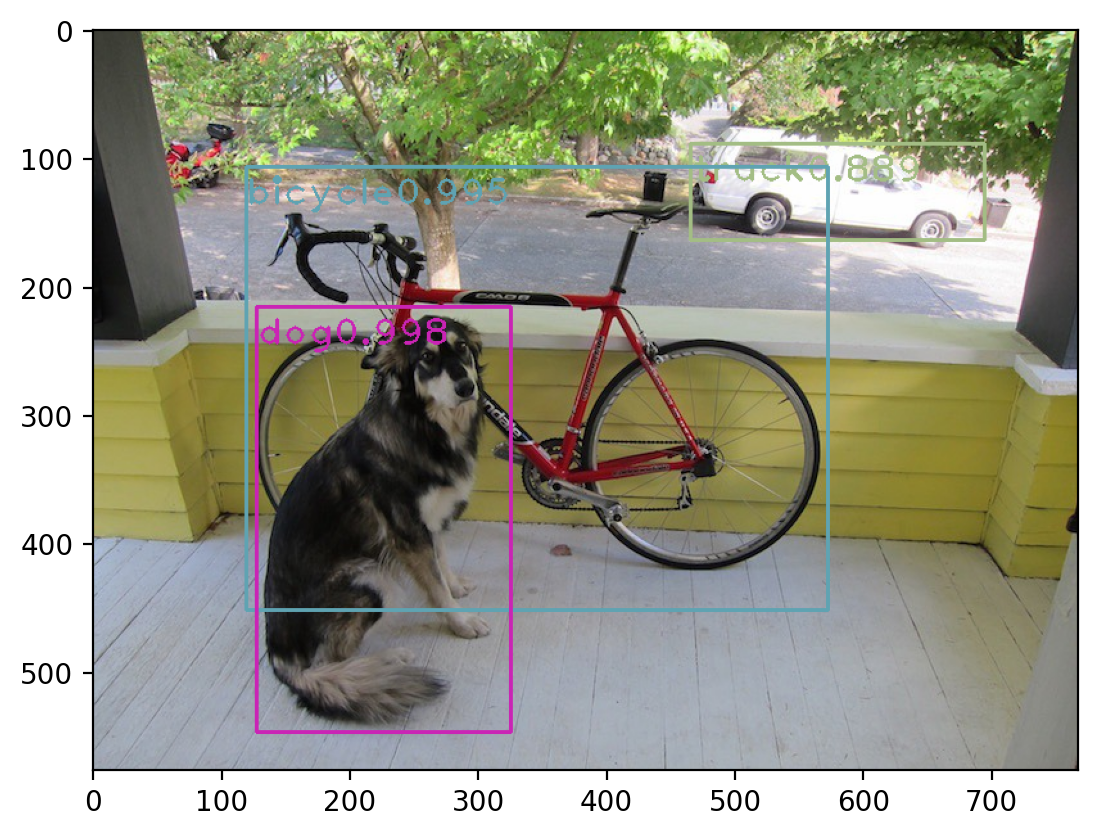

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

#**Week 10**

#### LSTM (Coin Data)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/06_딥러닝/실습코드'

/content/drive/MyDrive/06_딥러닝/실습코드


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 코인데스크 사이트에서 1년치 비트코인 가격 데이터 읽기
f=open('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r')
coindesk_data = pd.read_csv(f, header = 0) # 첫번째 행을 헤더로 사용
seq = coindesk_data[['Closing Price (USD)']].to_numpy() # 종가만 취함

# 시계열 데이터를 윈도우로 자름
def seq2dataset(seq, window, horizon):
  X = []; Y = []
  for i in range(len(seq)-(window+horizon)+1):
    x = seq[i:(i+window)]
    y = (seq[i+window+horizon-1])
    X.append(x); Y.append(y)
  return np.array(X), np.array(Y)


w=7
h=1

X,Y = seq2dataset(seq,w,h)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# 훈련 집합과 테스트 집합 분리
split = int(len(X)*0.8)
x_train = X[0:split]; y_train=Y[0:split]
x_test = X[split:]; y_test=Y[split:]

# LSTM 모델 설계와 학습
model = Sequential()
model.add(LSTM(units=128, activation='relu', input_shape = x_train[0].shape)) # 은닉층, 입력층
model.add(Dense(1)) # 출력층(activation 매개변수를 생략하여 기본값인 선형 사용 -> 회귀)
model.compile(loss='mae', optimizer='adam', metrics=['mae']) # 손실함수로 Mean Absolute Error 사용
hist = model.fit(x_train, y_train, epochs=200, batch_size=1, validation_data=(x_test, y_test), verbose=2)

# LSTM 모델 평가
ev = model.evaluate(x_test, y_test, verbose=0)
print('손실함수: ',ev[0],'MAE: ', ev[1])

# LSTM 모델로 예측을 수행
pred = model.predict(x_test)
print("MAPE: ", sum(abs(y_test-pred)/y_test)/len(x_test))

Epoch 1/200
2224/2224 - 22s - loss: 267.0164 - mae: 267.0164 - val_loss: 1067.5839 - val_mae: 1067.5839 - 22s/epoch - 10ms/step
Epoch 2/200
2224/2224 - 13s - loss: 215.1023 - mae: 215.1023 - val_loss: 1174.5509 - val_mae: 1174.5509 - 13s/epoch - 6ms/step
Epoch 3/200


KeyboardInterrupt: ignored

In [ ]:
# 학습 곡선
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([120,800])
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

# 예측 결과 시각화
x_range = range(len(y_test))
plt.plot(x_range, y_test[x_range], color='red')
plt.plot(x_range, pred[x_range], color='blue')
plt.legend(['True prices', 'Predicted prices'], loc='best')
plt.grid()
plt.show()


#### LSTM (Music Arrangement)

In [ ]:
import music21

# "작은별" 악보를 ABC로 표기
little_star = "tinynotation: 4/4 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2 g4 g4 f4 f4 e4 e4 d2 g4 g4 f4 f4 e4 e4 d2 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2"

# 스피커로 연주를 들려줌
music21.converter.parse(little_star).show('midi')

import numpy as np

# 계이름과 숫자를 상호변환
note2num = {'c':1, 'd':2, 'e':3, 'f':4, 'g':5, 'a':6, 'b':7}
num2note = {1:'c', 2:'d', 3:'e', 4:'f', 5:'g', 6:'a', 7:'b'}

# ABC 표기를 시계열 데이터로 변환
def abc2timeseries(s):
  notes = s.split(' ')[2:] # "tinynotation:", "4/4" 부분 제외
  print(notes)
  seq = []
  for i in notes:
    seq.append([note2num[i[0]],int(i[1])])
  return seq

# 시계열 데이터를 ABC 표기로 변환
def timeseries2abc(t):
  s='tinynotation: 4/4'
  for i in t:
    s = s+' '+num2note[i[0]]+str(i[1])
  return s

# 원 핫 코드
onehot = [[1,2],[2,2],[3,2],[4,2],[5,2],[6,2],[7,2],[1,4],[2,4],[3,4],[4,4],[5,4],[6,4],[7,4],[1,8],[2,8],[3,8],[4,8],[5,8],[6,8],[7,8]]

# 라벨을 원 핫 코드로 변환
def to_onehot(l):
  t=[]
  for i in range(len(l)):
    a=np.zeros(len(onehot))
    a[onehot.index(list(l[i]))]=1.0
    t.append(a)
  return np.array(t)

# 시계열 데이터를 훈련 집합으로 자름
def seq2dataset(seq,window,horizon):
  X=[]; Y=[]
  for i in range(len(seq)-(window+horizon)+1):
    x=seq[i:(i+window)]
    y=(seq[i+window+horizon-1])
    X.append(x), Y.append(y)
  return np.array(X), np.array(Y)

In [ ]:
# 첫 소절로 사용 될 데이터를 [[4,4], [3,4], [3,2], [3,4], [2,8], [2,8], [6,4], [7,4]] 로 했을 때의 결과

w = 8   # 윈도우 크기
h = 1   # 수평선 계수

seq = abc2timeseries(little_star)
X, Y = seq2dataset(seq,w,h)
print("X.shape:",X.shape, " Y.shape:",Y.shape)

print(X[0],Y[0])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import tensorflow as tf

# 훈련 집합 구축
split = int(len(X)*1.0)
x_train = X[0:split]; y_train=Y[0:split]
y_train = to_onehot(y_train)

# LSTM 모델 설계와 학습
model = Sequential()
model.add(LSTM(units=128, activation='relu', input_shape = x_train[0].shape)) # 은닉층, 입력층
model.add(Dense(y_train.shape[1],activation='softmax')) # 출력층(원 핫 코드의 길이는 21, Softmax -> 분류)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=200, batch_size=1, verbose=2)

# 학습된 모델로 편곡하는 함수(first_measure: 첫 소절, duration: 생성될 곡의 길이)
def arranging_music(model, first_measure, duration):
  music = first_measure   # 첫 소절 지정
  for i in range(duration):   # duration만큼 반복
    p=model.predict(np.float32(np.expand_dims(music[-w:], axis=0)))   # 직전 윈도우로 다음 음표 예측
    music=np.append(music,[onehot[np.argmax(p)]], axis=0)   # 가장 큰 확률을 가진 부류로 분류하고 ABC 표기로 변환
  return timeseries2abc(music)

first_measure = [[4,4], [3,4], [3,2], [3,4], [2,8], [2,8], [6,4], [7,4]]

new_song = arranging_music(model, first_measure, 50)

print(new_song)
music21.converter.parse(new_song).show('midi')

['c4', 'c4', 'g4', 'g4', 'a4', 'a4', 'g2', 'f4', 'f4', 'e4', 'e4', 'd4', 'd4', 'c2', 'g4', 'g4', 'f4', 'f4', 'e4', 'e4', 'd2', 'g4', 'g4', 'f4', 'f4', 'e4', 'e4', 'd2', 'c4', 'c4', 'g4', 'g4', 'a4', 'a4', 'g2', 'f4', 'f4', 'e4', 'e4', 'd4', 'd4', 'c2']
X.shape: (34, 8, 2)  Y.shape: (34, 2)
[[1 4]
 [1 4]
 [5 4]
 [5 4]
 [6 4]
 [6 4]
 [5 2]
 [4 4]] [4 4]
Epoch 1/200
34/34 - 1s - loss: 2.7360 - accuracy: 0.1471 - 1s/epoch - 40ms/step
Epoch 2/200
34/34 - 0s - loss: 2.1488 - accuracy: 0.2353 - 180ms/epoch - 5ms/step
Epoch 3/200
34/34 - 0s - loss: 2.0700 - accuracy: 0.3235 - 180ms/epoch - 5ms/step
Epoch 4/200
34/34 - 0s - loss: 2.0904 - accuracy: 0.1471 - 177ms/epoch - 5ms/step
Epoch 5/200
34/34 - 0s - loss: 1.9168 - accuracy: 0.3235 - 192ms/epoch - 6ms/step
Epoch 6/200
34/34 - 0s - loss: 1.8605 - accuracy: 0.2941 - 232ms/epoch - 7ms/step
Epoch 7/200
34/34 - 0s - loss: 1.6992 - accuracy: 0.4412 - 264ms/epoch - 8ms/step
Epoch 8/200
34/34 - 0s - loss: 1.8194 - accuracy: 0.3235 - 306ms/epoch - 9

In [ ]:
# 윈도우 크기를 w=5로 변경하고, 첫 소절로 사용 될 데이터를 [[4,4], [3,4], [3,2], [3,4], [2,8]] 로 했을 때의 결과

w = 5   # 윈도우 크기
h = 1   # 수평선 계수

seq = abc2timeseries(little_star)
X, Y = seq2dataset(seq,w,h)
print("X.shape:",X.shape, " Y.shape:",Y.shape)

print(X[0],Y[0])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import tensorflow as tf

# 훈련 집합 구축
split = int(len(X)*1.0)
x_train = X[0:split]
y_train = Y[0:split]
y_train = to_onehot(y_train)

# LSTM 모델 설계와 학습
model = Sequential()
model.add(LSTM(units=128, activation='relu', input_shape = x_train[0].shape)) # 은닉층, 입력층
model.add(Dense(y_train.shape[1],activation='softmax')) # 출력층(원 핫 코드의 길이는 21, Softmax -> 분류)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=200, batch_size=1, verbose=2)

# 학습된 모델로 편곡하는 함수(first_measure: 첫 소절, duration: 생성될 곡의 길이)
def arranging_music(model, first_measure, duration):
  music = first_measure   # 첫 소절 지정
  for i in range(duration):   # duration만큼 반복
    p=model.predict(np.float32(np.expand_dims(music[-w:], axis=0)))   # 직전 윈도우로 다음 음표 예측
    music=np.append(music,[onehot[np.argmax(p)]], axis=0)   # 가장 큰 확률을 가진 부류로 분류하고 ABC 표기로 변환
  return timeseries2abc(music)

first_measure = [[4,4], [3,4], [3,2], [3,4], [2,8]]

new_song = arranging_music(model, first_measure, 50)

print(new_song)
music21.converter.parse(new_song).show('midi')

['c4', 'c4', 'g4', 'g4', 'a4', 'a4', 'g2', 'f4', 'f4', 'e4', 'e4', 'd4', 'd4', 'c2', 'g4', 'g4', 'f4', 'f4', 'e4', 'e4', 'd2', 'g4', 'g4', 'f4', 'f4', 'e4', 'e4', 'd2', 'c4', 'c4', 'g4', 'g4', 'a4', 'a4', 'g2', 'f4', 'f4', 'e4', 'e4', 'd4', 'd4', 'c2']
X.shape: (37, 5, 2)  Y.shape: (37, 2)
[[1 4]
 [1 4]
 [5 4]
 [5 4]
 [6 4]] [6 4]
Epoch 1/200
37/37 - 2s - loss: 2.9089 - accuracy: 0.0811 - 2s/epoch - 47ms/step
Epoch 2/200
37/37 - 0s - loss: 2.2699 - accuracy: 0.2162 - 171ms/epoch - 5ms/step
Epoch 3/200
37/37 - 0s - loss: 2.0851 - accuracy: 0.1622 - 174ms/epoch - 5ms/step
Epoch 4/200
37/37 - 0s - loss: 1.9440 - accuracy: 0.3243 - 164ms/epoch - 4ms/step
Epoch 5/200
37/37 - 0s - loss: 1.8980 - accuracy: 0.2703 - 170ms/epoch - 5ms/step
Epoch 6/200
37/37 - 0s - loss: 1.7201 - accuracy: 0.3514 - 159ms/epoch - 4ms/step
Epoch 7/200
37/37 - 0s - loss: 1.5828 - accuracy: 0.4324 - 168ms/epoch - 5ms/step
Epoch 8/200
37/37 - 0s - loss: 1.5196 - accuracy: 0.3514 - 165ms/epoch - 4ms/step
Epoch 9/200
3